In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/DL_dataset/captcha2.zip

Archive:  /content/drive/MyDrive/DL_dataset/captcha2.zip
replace samples/226md.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

!cd /content/drive/MyDrive/DL_dataset/
# !ls

In [ ]:
# !cd /samples
!ls

bin	      content  home   media  python-apt  sbin		    tmp
boot	      datalab  lib    mnt    root	 srv		    tools
capthaimage   dev      lib32  opt    run	 sys		    usr
capthaimages  etc      lib64  proc   samples	 tensorflow-1.15.2  var


In [ ]:
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import os
import cv2
import string
import numpy as np

In [ ]:
symbols = string.ascii_lowercase + "0123456789" # All symbols captcha can contain
num_symbols = len(symbols)
img_shape = (50, 200, 1)

In [ ]:
def preprocess_data():
    n_samples = len(os.listdir('/content/samples'))
    X = np.zeros((n_samples, 50, 200, 1)) #1070*50*200
    y = np.zeros((5, n_samples, num_symbols)) #5*1070*36

    for i, pic in enumerate(os.listdir('/content/samples')):
        img = cv2.imread(os.path.join('/content/samples', pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4]
        # print(pic_target)
        if len(pic_target) < 6:
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))
            targs = np.zeros((5, num_symbols))
            for j, l in enumerate(pic_target):
                ind = symbols.find(l)
                targs[j, ind] = 1
            X[i] = img
            y[:, i] = targs
    
    return X, y

X, y = preprocess_data()

X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]
np.size(y_train[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='softmax')(drop)

        outs.append(res)
    
    model = Model(img, outs)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [ ]:
model=create_model();
model.summary();

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 50, 200, 16)  160         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 25, 100, 16)  0          ['conv2d_3[0][0]']               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d_3[0][0]']  

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(
    monitor='dense_20_acc', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None
)

In [ ]:
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=20,verbose=1, validation_split=0.2, callbacks = [callback])

Epoch 1/20
25/25 [==============================] - 10s 297ms/step - loss: 17.8804 - dense_11_loss: 3.6019 - dense_13_loss: 3.5636 - dense_15_loss: 3.5545 - dense_17_loss: 3.6010 - dense_19_loss: 3.5594 - dense_11_accuracy: 0.0528 - dense_13_accuracy: 0.0709 - dense_15_accuracy: 0.0477 - dense_17_accuracy: 0.0541 - dense_19_accuracy: 0.0593 - val_loss: 17.6182 - val_dense_11_loss: 3.5405 - val_dense_13_loss: 3.5103 - val_dense_15_loss: 3.5172 - val_dense_17_loss: 3.5580 - val_dense_19_loss: 3.4921 - val_dense_11_accuracy: 0.0155 - val_dense_13_accuracy: 0.0309 - val_dense_15_accuracy: 0.0722 - val_dense_17_accuracy: 0.0309 - val_dense_19_accuracy: 0.0258
Epoch 2/20
25/25 [==============================] - 7s 271ms/step - loss: 16.5049 - dense_11_loss: 3.3138 - dense_13_loss: 3.1659 - dense_15_loss: 3.3349 - dense_17_loss: 3.3534 - dense_19_loss: 3.3369 - dense_11_accuracy: 0.0915 - dense_13_accuracy: 0.1198 - dense_15_accuracy: 0.0631 - dense_17_accuracy: 0.0902 - dense_19_accuracy: 0.

In [ ]:
# Define function to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = img / 255.0
    else:
        print("Not detected");
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, 36))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
        #probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt#, sum(probs) / 5



In [ ]:
score= model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]],verbose=1)
print('Test Loss and accuracy:', score)

4/4 [==============================] - 0s 52ms/step - loss: 3.2137 - dense_1_loss: 0.2083 - dense_3_loss: 0.4840 - dense_5_loss: 0.7549 - dense_7_loss: 0.9952 - dense_9_loss: 0.7714 - dense_1_accuracy: 0.9703 - dense_3_accuracy: 0.9208 - dense_5_accuracy: 0.8416 - dense_7_accuracy: 0.7426 - dense_9_accuracy: 0.8317
Test Loss and accuracy: [3.213733673095703, 0.20827683806419373, 0.48399412631988525, 0.7548567056655884, 0.9952440857887268, 0.7713620662689209, 0.9702970385551453, 0.9207921028137207, 0.8415841460227966, 0.7425742745399475, 0.8316831588745117]


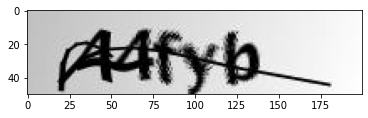

In [ ]:
#Lets test an unknown captcha
#preview
%matplotlib inline 
import matplotlib.pyplot as plt
img=cv2.imread('/samples/44fyb.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
#Lets Predict By Model
print("Predicted Captcha =",predict('/samples/44fyb.png'))

Predicted Captcha = 44fyb


In [ ]:
#tf.keras.models.save_model(model, 'CAPTCHATEXT_MDOEL.pb')

model.save("my_model.h5")
